In [1]:
## Import packages and classes.

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
import statistics
import scipy.stats
import pandas as pd
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [2]:
df = df = pd.read_csv('nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
# Measure of Central Tendency: Mean

print ("Mean of Units for All Boroughs: ")
print ("Residential Units: ", statistics.mean(df['RESIDENTIAL UNITS']))
print ("Commercial Units: ", statistics.mean(df['COMMERCIAL UNITS']))
print ("All Units: ", statistics.mean(df['TOTAL UNITS']))

Mean of Units for All Boroughs: 
Residential Units:  2.0252637554998345
Commercial Units:  0.19355868855561337
All Units:  2.249183895538629


In [5]:
# SAN Check

len_res = int(df['RESIDENTIAL UNITS'].size)
sum_res = int(df['RESIDENTIAL UNITS'].sum())
mean_ = sum_res / len_res
print("Res. Units Mean: ", mean_)

Res. Units Mean:  2.0252637554998345


In [6]:
# Measure of Central Tendency: Median

print ("Median of Units for All Boroughs: ")
print ("Residential Units: ", ( df['RESIDENTIAL UNITS'].max() - df['RESIDENTIAL UNITS'].min() ) / 2)
print ("Commercial Units: ", ( df['COMMERCIAL UNITS'].max() - df['COMMERCIAL UNITS'].min() ) / 2)
print ("All Units: ", ( df['TOTAL UNITS'].max() - df['TOTAL UNITS'].min() ) / 2)

Median of Units for All Boroughs: 
Residential Units:  922.0
Commercial Units:  1130.5
All Units:  1130.5


In [7]:
# Measure of Central Tendency: Modus

print ("Modus of Units for All Boroughs: ")
print ("Residential Units: ", df['RESIDENTIAL UNITS'].value_counts().index[0])
print ("Commercial Units: ", df['COMMERCIAL UNITS'].value_counts().index[0])
print ("All Units: ", df['TOTAL UNITS'].value_counts().index[0])

Modus of Units for All Boroughs: 
Residential Units:  1
Commercial Units:  0
All Units:  1


In [8]:
# SAN Check with Value Counts

print(df['RESIDENTIAL UNITS'].value_counts())
print("modus:", df['RESIDENTIAL UNITS'].value_counts().index[0])

1      34722
0      24783
2      16049
3       4608
4       1346
       ...  
335        1
271        1
369        1
143        1
127        1
Name: RESIDENTIAL UNITS, Length: 176, dtype: int64
modus: 1


In [9]:
# Measure of Spread: Range

print ("Range of Units for All Boroughs: ")
print ("Residential Units: [Max = ", df['RESIDENTIAL UNITS'].max(), "] [Min = ",df['RESIDENTIAL UNITS'].min(), "] [Range = ", np.ptp(df['RESIDENTIAL UNITS']), "]")
print ("Commercial Units: [Max = ", df['COMMERCIAL UNITS'].max(), "] [Min = ",df['COMMERCIAL UNITS'].min(), "] [Range = ", np.ptp(df['COMMERCIAL UNITS']), "]")
print ("All Units: [Max = ", df['TOTAL UNITS'].max(), "] [Min = ",df['TOTAL UNITS'].min(), "] [Range = ", np.ptp(df['TOTAL UNITS']), "]")

Range of Units for All Boroughs: 
Residential Units: [Max =  1844 ] [Min =  0 ] [Range =  1844 ]
Commercial Units: [Max =  2261 ] [Min =  0 ] [Range =  2261 ]
All Units: [Max =  2261 ] [Min =  0 ] [Range =  2261 ]


In [10]:
# Measure of Spread: Variance

print ("Variance of Units for All Boroughs: ")
print ("Residential Units: ", statistics.variance(df['RESIDENTIAL UNITS']))
print ("Commercial Units: ", statistics.mean(df['COMMERCIAL UNITS']))
print ("All Units: ", statistics.mean(df['TOTAL UNITS']))

Variance of Units for All Boroughs: 
Residential Units:  279.59307883920485
Commercial Units:  0.19355868855561337
All Units:  2.249183895538629


In [11]:
# Measure of Spread: Standard Deviation

print ("Variance of Units for All Boroughs: ")
print ("Residential Units: ", statistics.stdev(df['RESIDENTIAL UNITS']))
print ("Commercial Units: ", statistics.stdev(df['COMMERCIAL UNITS']))
print ("All Units: ", statistics.stdev(df['TOTAL UNITS']))

Variance of Units for All Boroughs: 
Residential Units:  16.72103701446788
Commercial Units:  8.713183368246835
All Units:  18.97258443202673


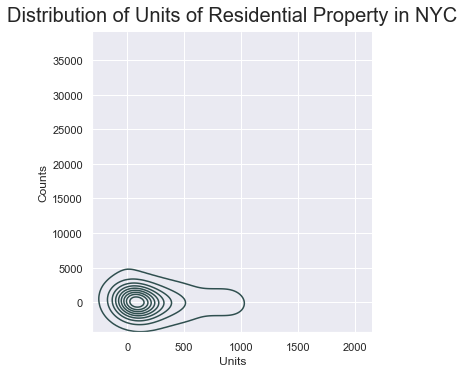

In [12]:
# Probability Distribution

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# Preparing Data

df_res_columned = df['RESIDENTIAL UNITS'].value_counts().reset_index()
df_res_columned.columns = ['Units', 'Counts']
cols = list(df_res_columned.columns)
a, b = cols.index('Counts'), cols.index('Units')
cols[b], cols[a] = cols[a], cols[b]
df_res_columned = df_res_columned[cols]
df_res_columned

# Plot for Distribution
sns.displot(data=df_res_columned, x='Units', y='Counts', kind='kde', color="darkslategrey")
plt.xlabel("Units")
plt.ylabel("Counts")
plt.title("Distribution of Units of Residential Property in NYC", y=1.015, fontsize=20);

In [13]:
# Confidence Intervals

import statsmodels.api as sm

res_sales = df['RESIDENTIAL UNITS'].sum()
total_sales = df['TOTAL UNITS'].sum()
sales_prop = res_sales / total_sales


sm.stats.proportion_confint(total_sales * sales_prop, total_sales)

(0.8990981333353525, 0.9017895215309735)

In [14]:
df_year = df.drop(df.index[df['YEAR BUILT'] == 0])
df_year = df_year.value_counts(subset=['YEAR BUILT', 'RESIDENTIAL UNITS']).to_frame()
df_year = df_year.reset_index()
df_year.columns = ['Year', 'Units', 'Count']
df_year

,Year,Units,Count
0,1920,1,2397
1,1925,1,2166
2,1920,2,2155
3,1930,1,2037
4,1950,1,1588
...,...,...,...
1573,1929,529,1
1574,1930,14,1
1575,1930,18,1
1576,1930,23,1
